In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.feature_selection import VarianceThreshold,SelectKBest,f_classif,chi2
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score



In [ ]:
df = pd.read_csv('/content/credit1.zip')   #loading data

**EDA**

In [ ]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [ ]:
df.shape

(100000, 28)

In [ ]:
df.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [ ]:
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [ ]:
df.duplicated().value_counts()

False    100000
dtype: int64

In [ ]:
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [ ]:
#since 'Credit_Score' is our target column, let's see the unique values there and what percentage each of them contributes
df['Credit_Score'].value_counts(normalize=True) * 100

Standard    53.174
Poor        28.998
Good        17.828
Name: Credit_Score, dtype: float64

In [ ]:
# define numerical & categorical columns
num_cols = df.select_dtypes(exclude='object').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()

# print columns
print('We have {} numerical columns : {}'.format(len(num_cols), num_cols))
print('\nWe have {} categorical columns : {}'.format(len(cat_cols), cat_cols))

We have 21 numerical columns : ['ID', 'Customer_ID', 'Month', 'Age', 'SSN', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

We have 7 categorical columns : ['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']


In [ ]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

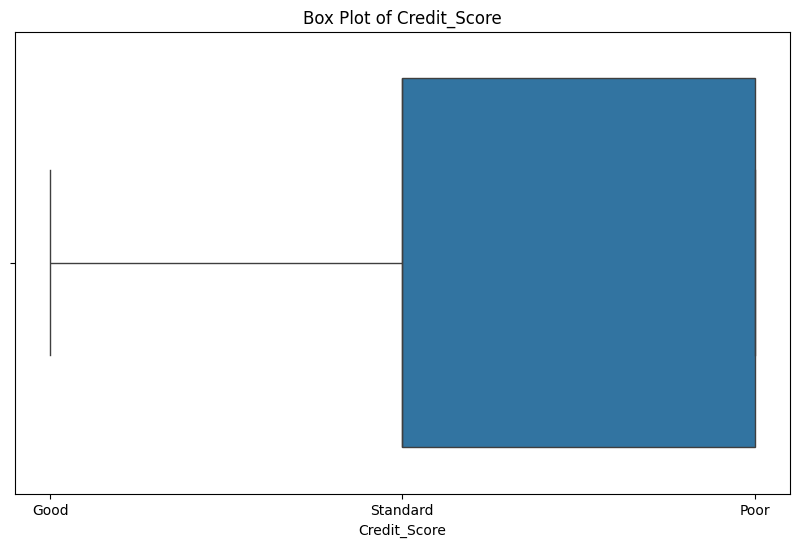

In [ ]:
#  Outlier Detection
# Box plot for outlier detection
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Credit_Score'])
plt.title('Box Plot of Credit_Score')
plt.show()

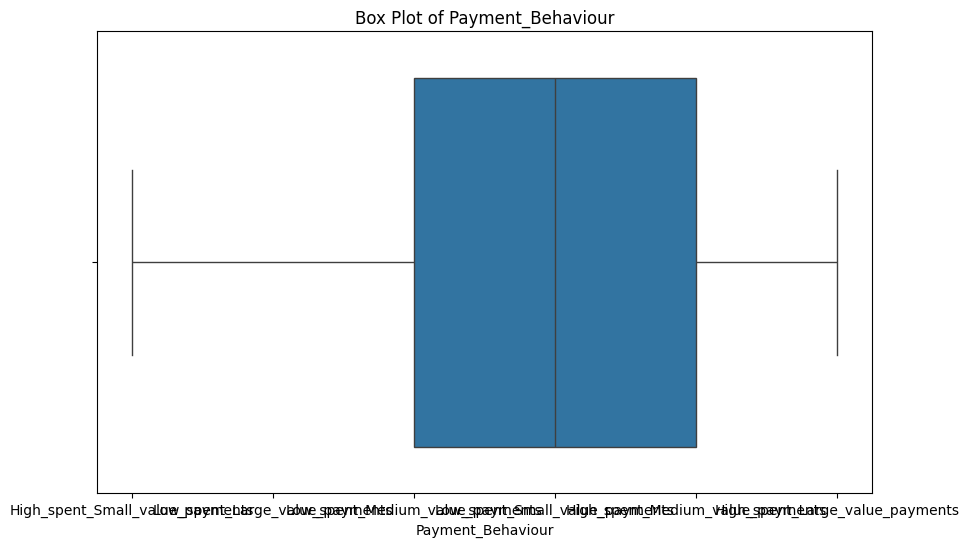

In [ ]:
#  Outlier Detection
# Box plot for outlier detection
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Payment_Behaviour'])
plt.title('Box Plot of Payment_Behaviour')
plt.show()

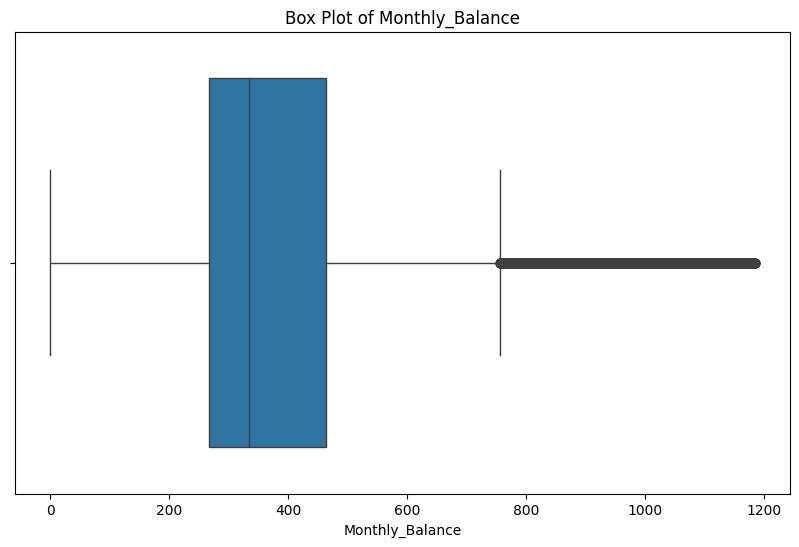

In [ ]:
#  Outlier Detection
# Box plot for outlier detection
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Monthly_Balance'])
plt.title('Box Plot of Monthly_Balance')
plt.show()

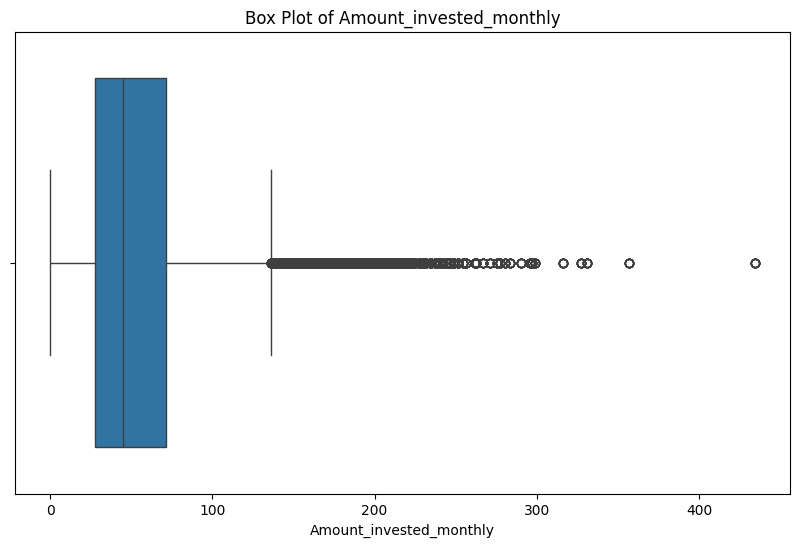

In [ ]:
#  Outlier Detection
# Box plot for outlier detection
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Amount_invested_monthly'])
plt.title('Box Plot of Amount_invested_monthly')
plt.show()

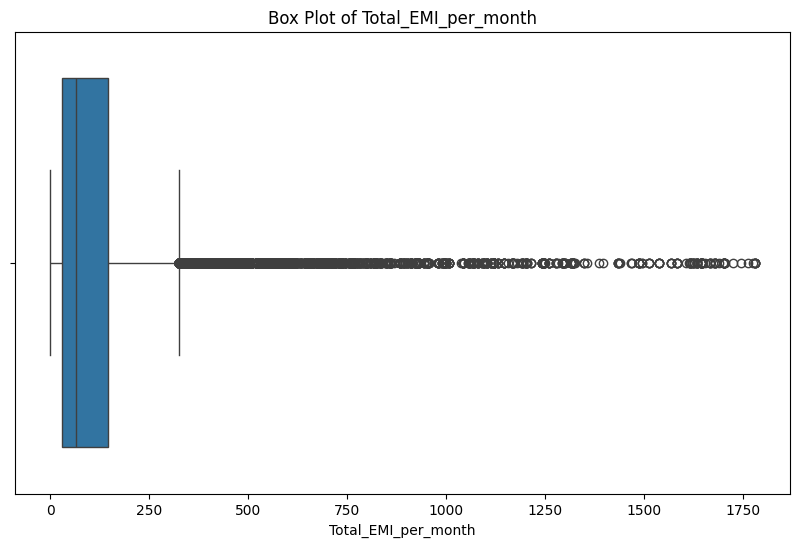

In [ ]:
#  Outlier Detection
# Box plot for outlier detection
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Total_EMI_per_month'])
plt.title('Box Plot of Total_EMI_per_month')
plt.show()

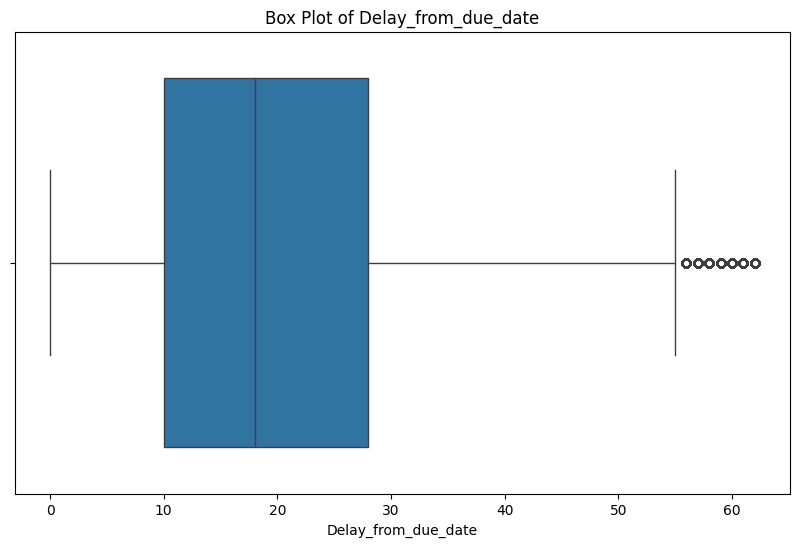

In [ ]:
#  Outlier Detection
# Box plot for outlier detection
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Delay_from_due_date'])
plt.title('Box Plot of Delay_from_due_date')
plt.show()

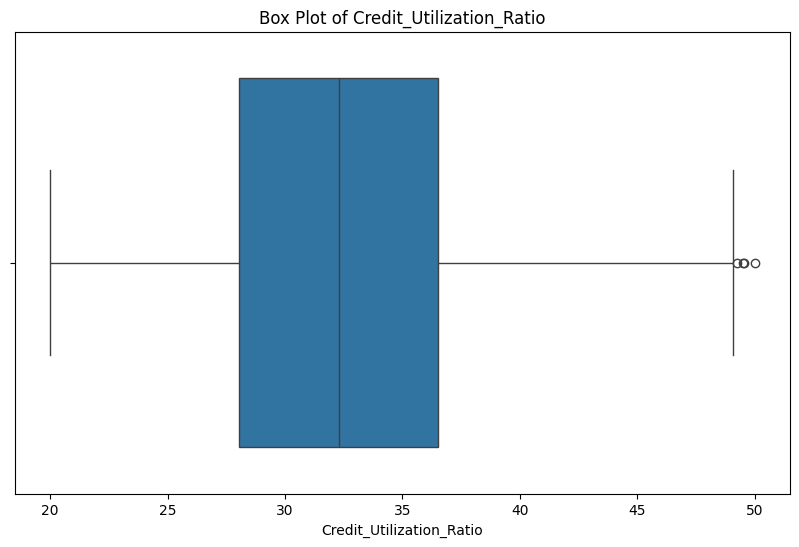

In [ ]:
#  Outlier Detection
# Box plot for outlier detection
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Credit_Utilization_Ratio'])
plt.title('Box Plot of Credit_Utilization_Ratio')
plt.show()

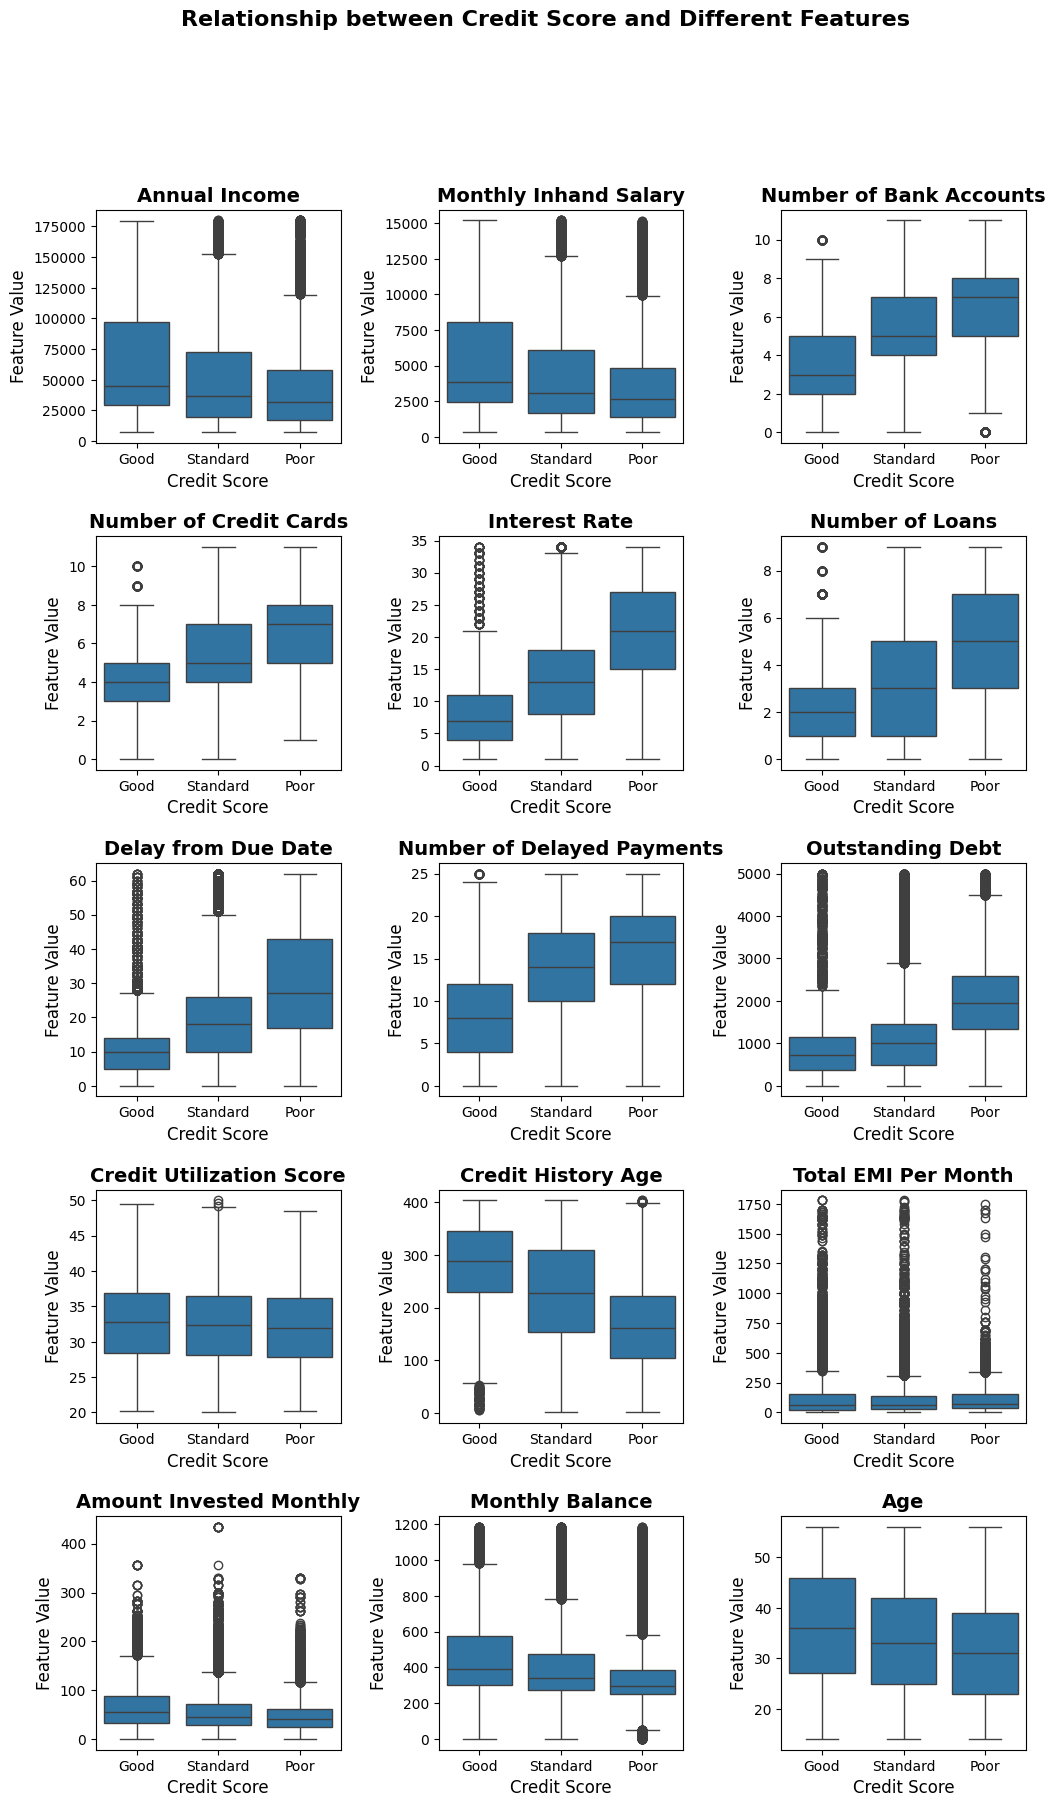

In [ ]:
# Create a figure and 2x3 grid of subplots
fig, ax = plt.subplots(5, 3, figsize=(12, 20))

# Flatten the 2D array of subplots into a 1D array
ax = ax.flatten()

# Plot multiple box plots on the same axis
sns.boxplot(x='Credit_Score', y='Annual_Income', data=df, ax=ax[0])
sns.boxplot(x='Credit_Score', y='Monthly_Inhand_Salary', data=df, ax=ax[1])
sns.boxplot(x='Credit_Score', y='Num_Bank_Accounts', data=df, ax=ax[2])
sns.boxplot(x='Credit_Score', y='Num_Credit_Card', data=df, ax=ax[3])
sns.boxplot(x='Credit_Score', y='Interest_Rate', data=df, ax=ax[4])
sns.boxplot(x='Credit_Score', y='Num_of_Loan', data=df, ax=ax[5])
sns.boxplot(x='Credit_Score', y='Delay_from_due_date', data=df, ax=ax[6])
sns.boxplot(x='Credit_Score', y='Num_of_Delayed_Payment', data=df, ax=ax[7])
sns.boxplot(x='Credit_Score', y='Outstanding_Debt', data=df, ax=ax[8])
sns.boxplot(x='Credit_Score', y='Credit_Utilization_Ratio', data=df, ax=ax[9])
sns.boxplot(x='Credit_Score', y='Credit_History_Age', data=df, ax=ax[10])
sns.boxplot(x='Credit_Score', y='Total_EMI_per_month', data=df, ax=ax[11])
sns.boxplot(x='Credit_Score', y='Amount_invested_monthly', data=df, ax=ax[12])
sns.boxplot(x='Credit_Score', y='Monthly_Balance', data=df, ax=ax[13])
sns.boxplot(x='Credit_Score', y='Age', data=df, ax=ax[14])

# Add a title and labels
#plt.title('Relationship between Credit Score and Different Features')
plt.xlabel('Credit Score')
plt.ylabel('Feature Value')

# Adjust the spacing between subplots
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Add a white grid
for i in range(15):
    ax[i].grid(color='white', linestyle='-', linewidth=2, alpha=0.5)

# Add a title and labels
fig.suptitle('Relationship between Credit Score and Different Features', fontsize=16, fontweight='bold')

# Set the font size for all subplot titles
titles = ['Annual Income', 'Monthly Inhand Salary', 'Number of Bank Accounts', 'Number of Credit Cards',
          'Interest Rate', 'Number of Loans', 'Delay from Due Date', 'Number of Delayed Payments',
          'Outstanding Debt', 'Credit Utilization Ratio', 'Credit History Age', 'Total EMI Per Month',
          'Amount Invested Monthly', 'Monthly Balance', 'Age']

for i in range(15):
    ax[i].set_title(titles[i], fontsize=14, fontweight='bold')

    # Set the font size for all x and y labels
for i in range(15):
    ax[i].set_xlabel('Credit Score', fontsize=12)
    ax[i].set_ylabel('Feature Value', fontsize=12)

# Show the plot
plt.show()

<ipython-input-95-0124a089da81>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.7)


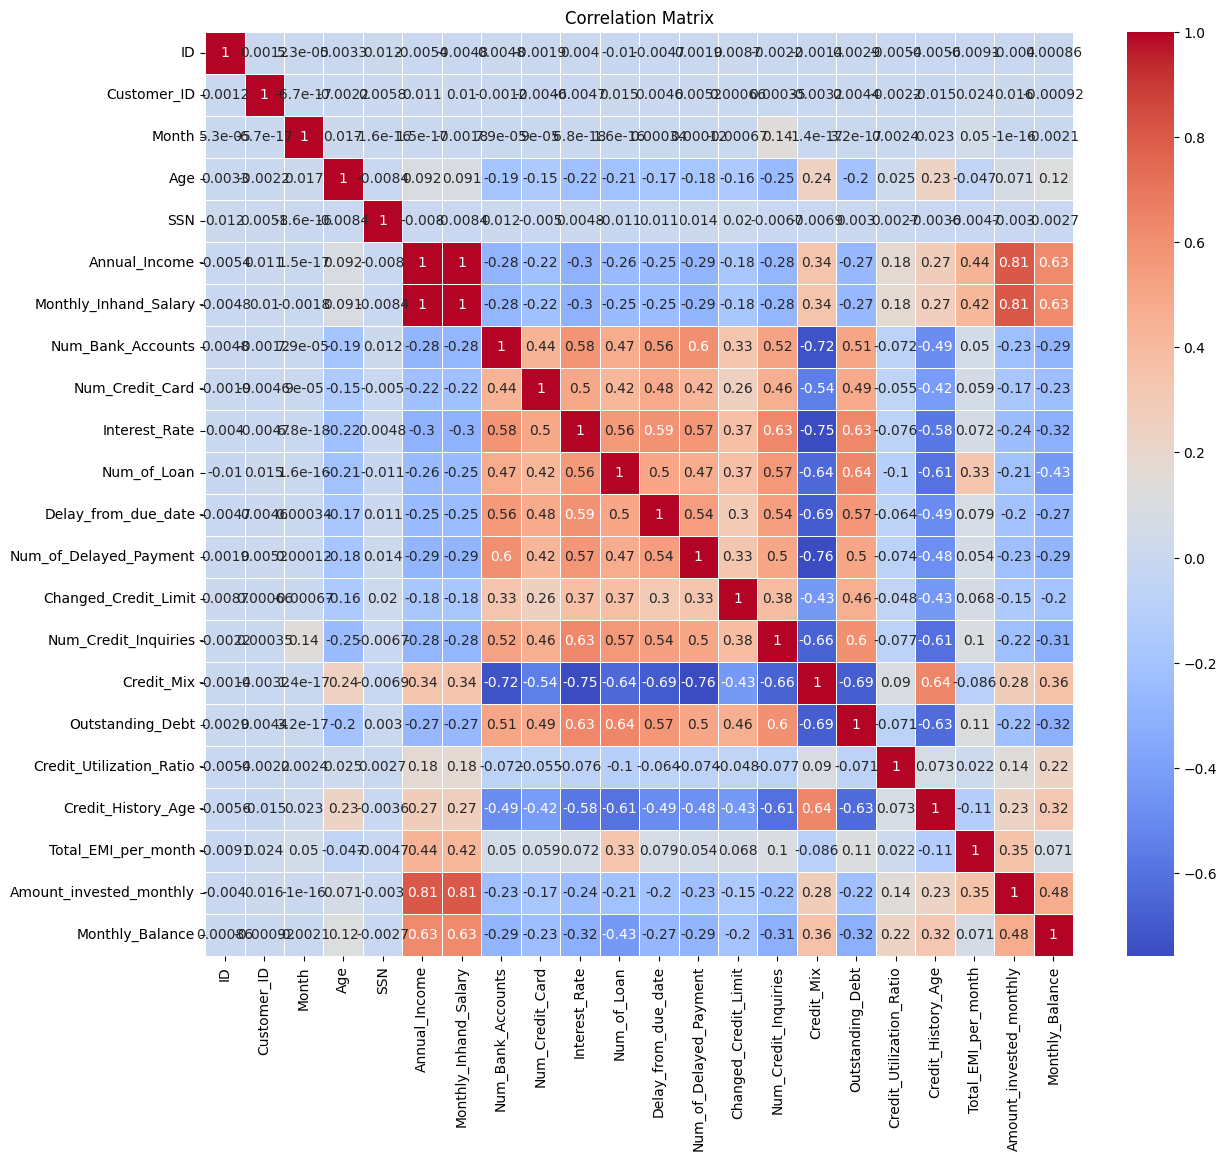

In [95]:
# Heatmap for correlation matrix
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.7)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df_prep = df.copy()
df_prep.head(3)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good


In [ ]:
df_prep.columns


Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
# remove CustomerID to see duplicate rows
df_prep.drop('ID', axis=1, inplace=True)

In [ ]:
df_prep.drop('Customer_ID', axis=1, inplace=True)
df_prep.drop('Month', axis=1, inplace=True)
df_prep.drop('Name', axis=1, inplace=True)
df_prep.drop('Age', axis=1, inplace=True)
df_prep.drop('SSN', axis=1, inplace=True)

In [ ]:

# remove duplicate rows
df_prep.drop_duplicates(inplace=True)
print(f'The number of rows after filtering duplicate data is {df_prep.shape[0]}')

The number of rows after filtering duplicate data is 100000


In [ ]:
df_prep.columns

Index(['Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

Handling outliers

In [ ]:
from scipy import stats

In [ ]:
####### Remove the outliers using IQR method function
def detect_outliers_iqr(data):
   outliers = []
   data = sorted(data)
   q1 = np.percentile(data, 25)
   q3 = np.percentile(data, 75)
   IQR = q3-q1
   lwr_bound = q1-(1.5*IQR)
   upr_bound = q3+(1.5*IQR)
   for i in data:
       if (i<lwr_bound or i>upr_bound):
           outliers.append(i)


   return outliers

In [71]:
#out=['Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt','Credit_History_Age','Monthly_Balance']
for i in ['Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt','Credit_History_Age','Monthly_Balance']:
    outliers = detect_outliers_iqr(df_prep[i])
    #Calculate the mode value of the dataframe
    mode=df_prep[i].mode()[0]       # Replace the outliers with the mode value using where
    df_prep[i] = df_prep[i].where(~df_prep[i].isin(outliers), mode)

In [72]:
out=['Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt','Credit_History_Age','Monthly_Balance']

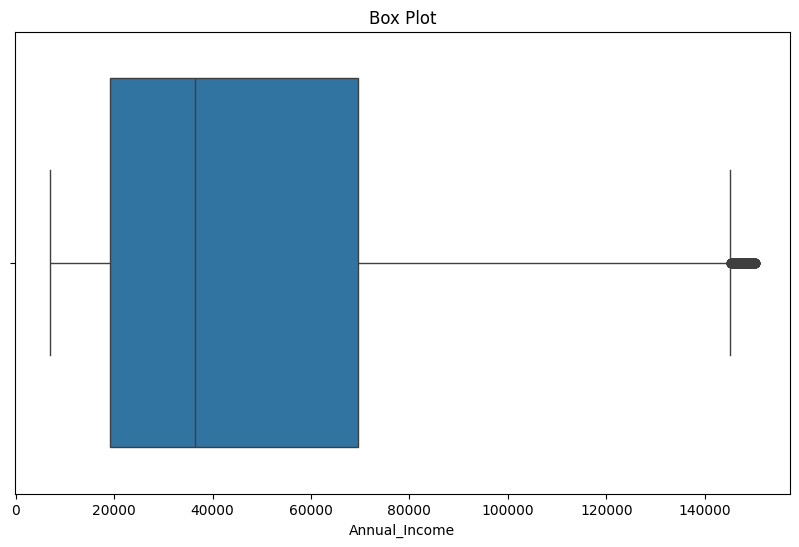

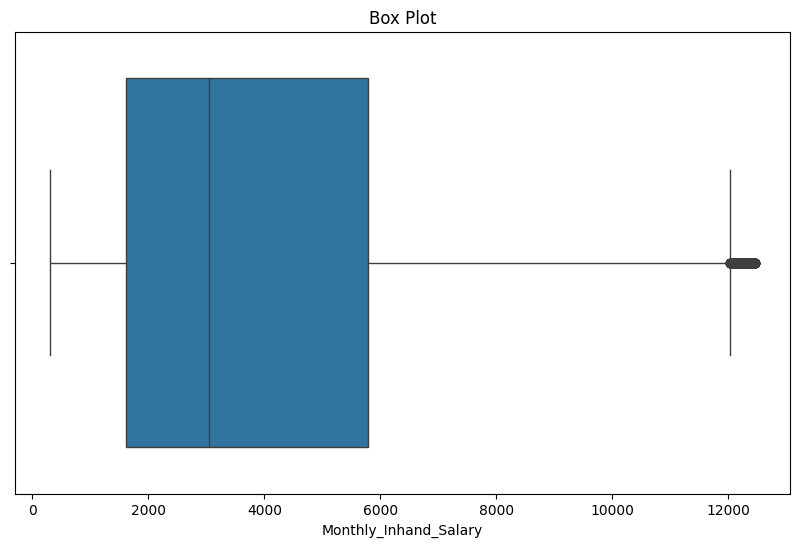

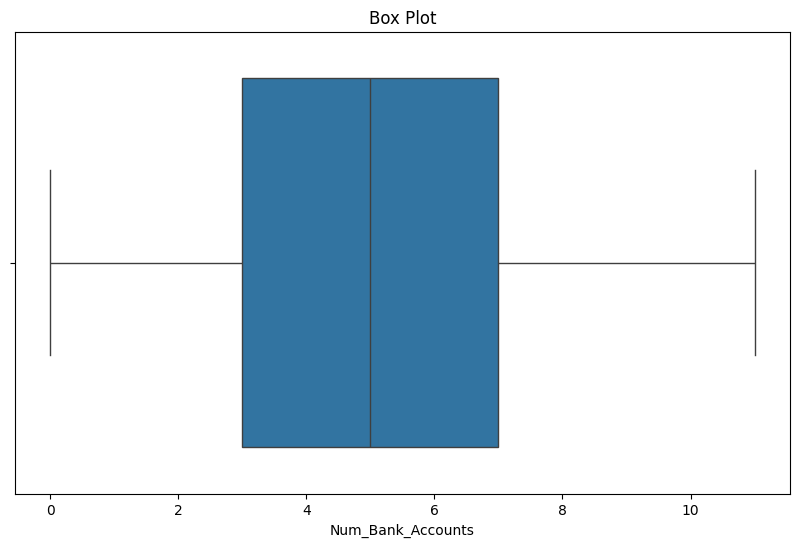

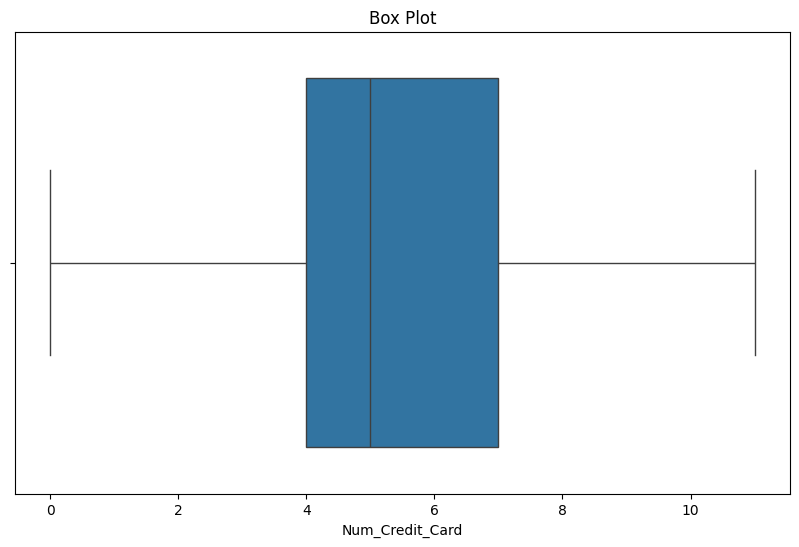

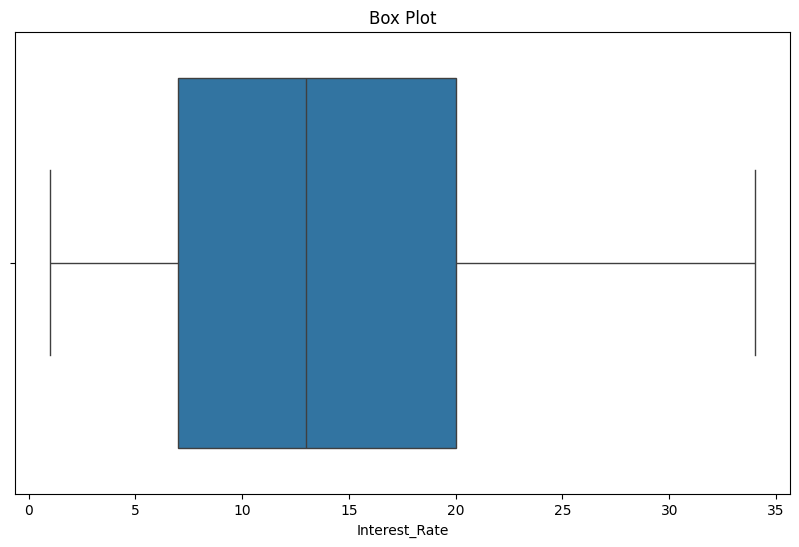

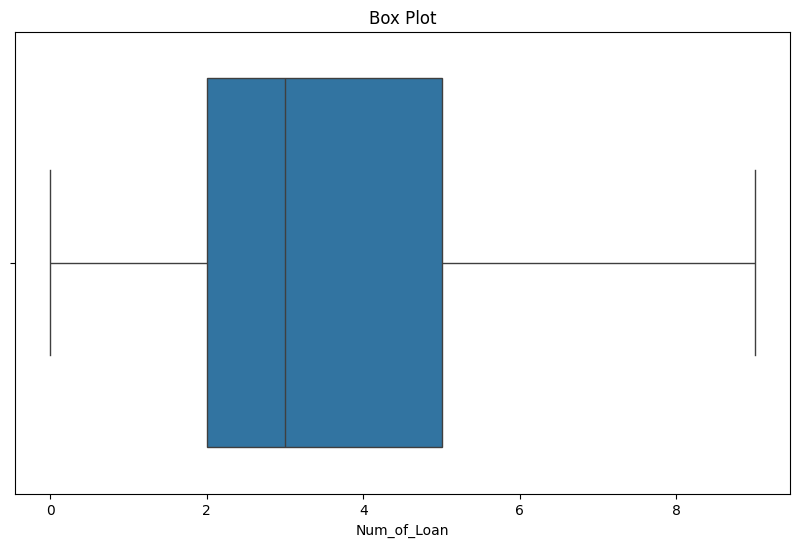

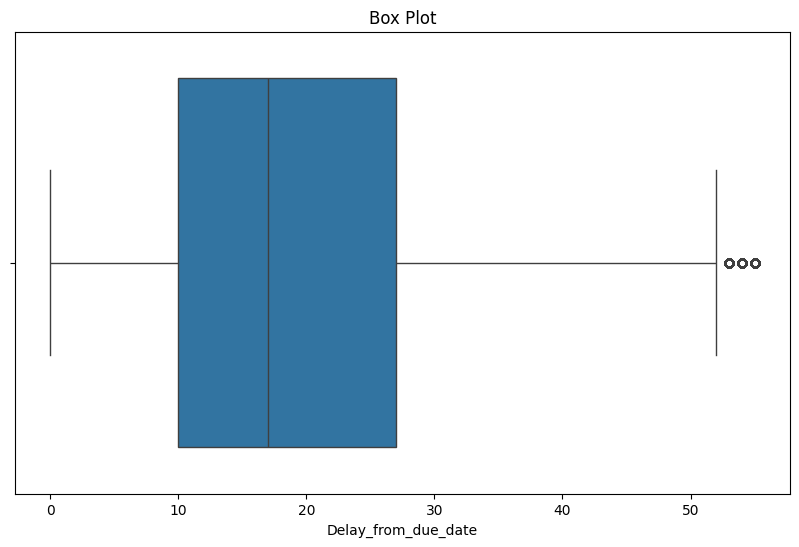

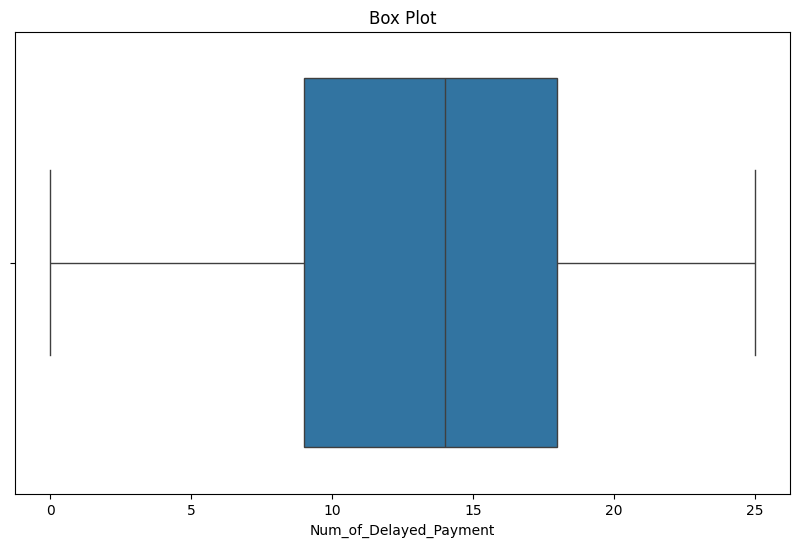

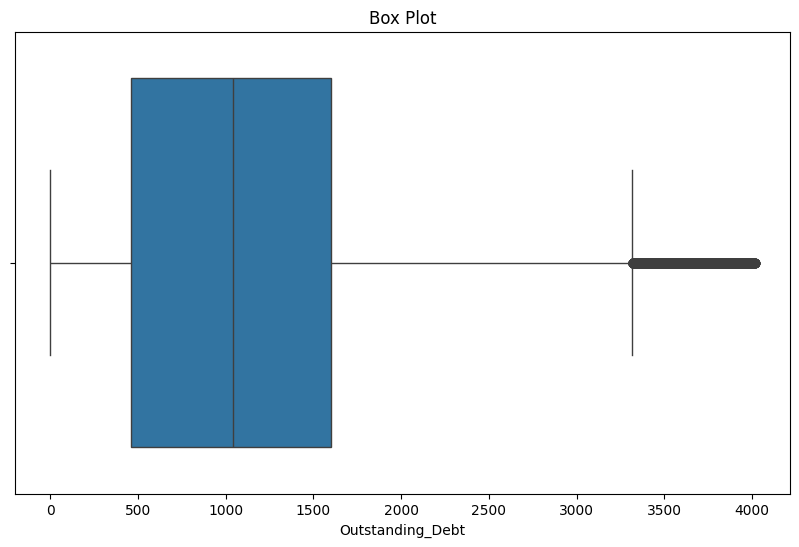

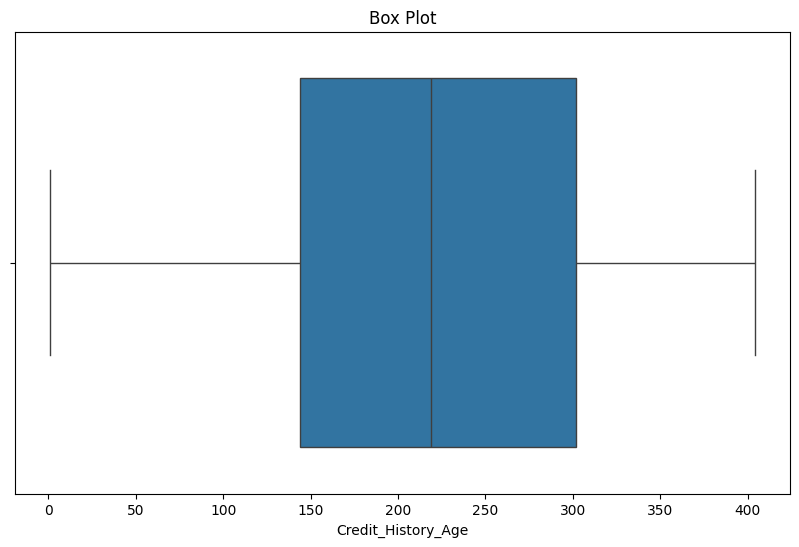

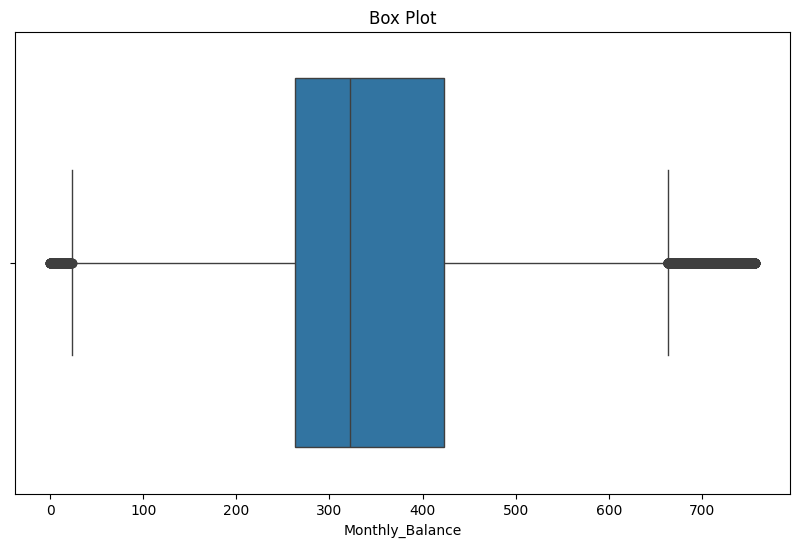

In [82]:
for i in out:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_prep[i])
    plt.title('Box Plot')
    plt.show()


Credit Score Classification Model

The Credit_Mix column is valuable for determining credit scores as it tells about the types of credits and loans you have taken.

Since the column is categorical, let's transform it into a numerical feature so that we can use it to train a Machine Learning model for the task of credit score classification:


Encoding

In [97]:
# Before transformation
df_prep['Credit_Mix'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [98]:
#Transforming the column in 0, 1, or 2.
df_prep['Credit_Mix'] = df['Credit_Mix'].map({'Good': 2, 'Standard': 1, 'Bad': 0})

In [99]:
# After transformation
df_prep['Credit_Mix'].unique()

array([nan])

**Splitting of data into features and target**

In [100]:
# Importing train_test_split and splitting the data in X (features) and y(target)
from sklearn.model_selection import train_test_split

In [101]:
X = df_prep[["Annual_Income", "Monthly_Inhand_Salary", "Num_Bank_Accounts", "Num_Credit_Card", "Interest_Rate", "Num_of_Loan",
        "Delay_from_due_date", "Num_of_Delayed_Payment", "Credit_Mix", "Outstanding_Debt", "Credit_History_Age",
        "Monthly_Balance"]].values
y = df_prep['Credit_Score'].values